In [1]:
#import the data set
import pandas as pd
import numpy as np
df=pd.read_csv('mcdonalds.csv')
print(df.head())

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  


In [2]:
segmentation_df=df.iloc[:,:11]  #selects the first 11 columns
print(segmentation_df.head())

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting  
0         No  
1         No  
2         No  
3        Yes  
4         No  


In [3]:
#Convert to NumPy matrix (array)
segmentation_matrix = segmentation_df.values  #this creates the dataframe into a numpy array
print(segmentation_matrix)

[['No' 'Yes' 'No' ... 'Yes' 'No' 'No']
 ['Yes' 'Yes' 'No' ... 'Yes' 'No' 'No']
 ['No' 'Yes' 'Yes' ... 'Yes' 'Yes' 'No']
 ...
 ['Yes' 'Yes' 'No' ... 'Yes' 'No' 'No']
 ['Yes' 'Yes' 'No' ... 'No' 'Yes' 'No']
 ['No' 'Yes' 'No' ... 'Yes' 'No' 'Yes']]


In [4]:
#Create logical matrix where entries are True if "YES", else False
logical_matrix = (segmentation_matrix == "Yes")   #creates a boolean array marking "YES" entries.
print(logical_matrix)

[[False  True False ...  True False False]
 [ True  True False ...  True False False]
 [False  True  True ...  True  True False]
 ...
 [ True  True False ...  True False False]
 [ True  True False ... False  True False]
 [False  True False ...  True False  True]]


In [5]:
#Convert boolean matrix to numeric (1 for True, 0 for False)
numeric_matrix = logical_matrix.astype(int)
average_values = numeric_matrix.mean(axis=0)
for col_name, avg in zip(segmentation_df.columns, average_values):
     print(f"{col_name}: {avg:.2f}")

yummy: 0.55
convenient: 0.91
spicy: 0.09
fattening: 0.87
greasy: 0.53
fast: 0.90
cheap: 0.60
tasty: 0.64
expensive: 0.36
healthy: 0.20
disgusting: 0.24


In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA()
pca.fit(numeric_matrix)

summary_df = pd.DataFrame({
    'Standard Deviation': np.sqrt(pca.explained_variance_),
    'Proportion of Variance': pca.explained_variance_ratio_,
    'Cumulative Proportion': np.cumsum(pca.explained_variance_ratio_)
})
# Round for better readability
print(summary_df.round(4))


    Standard Deviation  Proportion of Variance  Cumulative Proportion
0               0.7570                  0.2994                 0.2994
1               0.6075                  0.1928                 0.4922
2               0.5046                  0.1330                 0.6253
3               0.3988                  0.0831                 0.7084
4               0.3374                  0.0595                 0.7679
5               0.3103                  0.0503                 0.8182
6               0.2897                  0.0438                 0.8620
7               0.2751                  0.0395                 0.9016
8               0.2653                  0.0368                 0.9383
9               0.2488                  0.0324                 0.9707
10              0.2369                  0.0293                 1.0000


In [9]:
std_devs = np.sqrt(pca.explained_variance_)
print("Standard deviations:")
print(np.round(std_devs, 1))  # rounded to 1 decimal place

# 2. Loadings (components / rotation matrix)
loadings = pd.DataFrame(
    np.round(pca.components_.T, 1),  # transpose to get features x PCs
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=segmentation_df.columns
)

print("\nLoadings (PCA rotation matrix):")
print(loadings)

Standard deviations:
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]

Loadings (PCA rotation matrix):
            PC1  PC2  PC3  PC4  PC5  PC6  PC7  PC8  PC9  PC10  PC11
yummy       0.5 -0.4  0.3  0.1  0.3 -0.2 -0.3 -0.0 -0.6   0.1  -0.0
convenient  0.2 -0.0  0.1 -0.1 -0.3  0.3 -0.1  0.1  0.0   0.7   0.5
spicy       0.0 -0.0  0.0  0.2 -0.1  0.4  0.7 -0.4 -0.4   0.1  -0.1
fattening  -0.1  0.0  0.3 -0.4  0.1  0.4 -0.4 -0.6  0.2   0.0  -0.3
greasy     -0.3  0.1  0.8  0.3 -0.4 -0.2  0.0  0.1  0.0  -0.0  -0.0
fast        0.1  0.1  0.1 -0.1 -0.1  0.6 -0.1  0.6 -0.2  -0.2  -0.3
cheap       0.3  0.6  0.1  0.1  0.1  0.1 -0.0 -0.1 -0.1  -0.4   0.5
tasty       0.5 -0.3  0.3 -0.0  0.2  0.1  0.4  0.1  0.6  -0.1  -0.0
expensive  -0.3 -0.6 -0.0  0.1  0.0  0.3 -0.1 -0.0 -0.1  -0.5   0.5
healthy     0.2 -0.1 -0.2  0.8 -0.3  0.2 -0.3 -0.2  0.2   0.0  -0.2
disgusting -0.4  0.1  0.1  0.4  0.7  0.2 -0.0  0.2  0.1   0.3   0.0


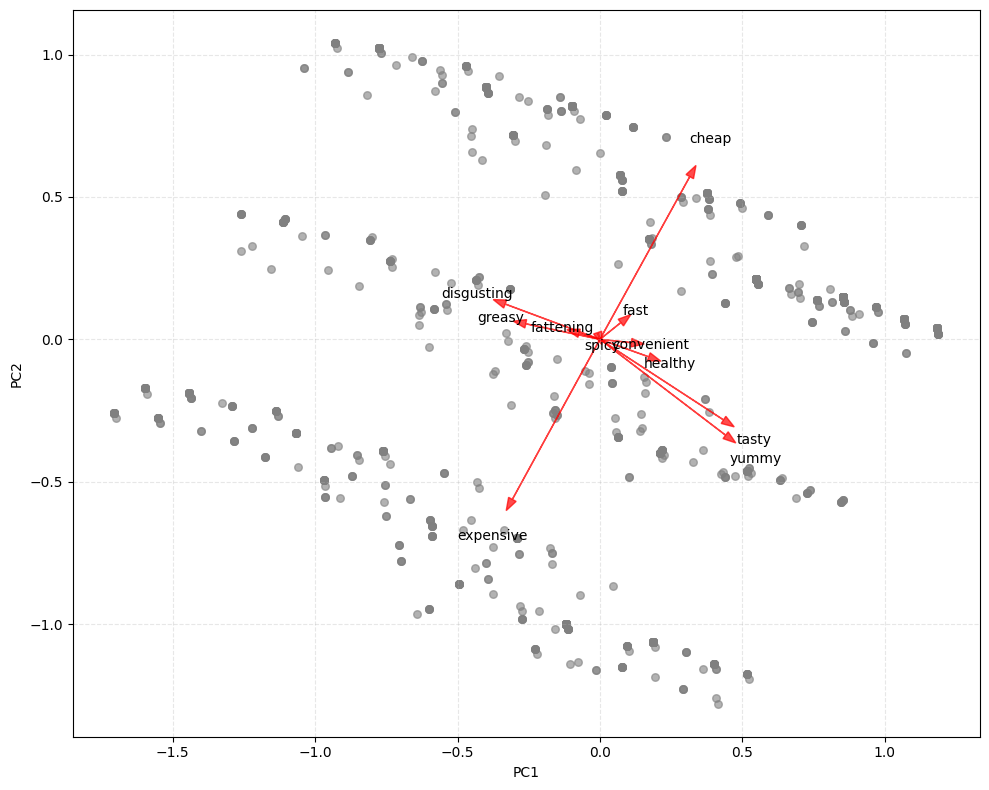

In [10]:

# Step 1: Fit PCA on the binary matrix (each row = respondent, columns = binary attributes)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(numeric_matrix)  # consumer projections
loadings = pca.components_.T               # variable vectors (rotation)

# Step 2: Plot perceptual map
plt.figure(figsize=(10, 8))

# Plot consumers in grey
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='grey', alpha=0.6, s=30, label='Consumers')

# Plot arrows (segmentation attributes)
for i, var in enumerate(segmentation_df.columns):
    x, y = loadings[i, 0], loadings[i, 1]
    plt.arrow(0, 0, x, y, color='red', alpha=0.7, head_width=0.03, length_includes_head=True)
    plt.text(x * 1.15, y * 1.15, var.lower(), color='black', ha='center', va='center')

# Plot aesthetics
plt.grid(True, linestyle='--', alpha=0.3)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()


In [11]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.optimize import linear_sum_assignment
import matplotlib.pyplot as plt

# Step 1: Load and prepare binary segmentation matrix
df = pd.read_csv('mcdonalds.csv')
segmentation_df = df.iloc[:, :11]
numeric_matrix = (segmentation_df.values == 'Yes').astype(int)

# Step 2: KMeans clustering from 2 to 8 clusters
k_range = range(2, 9)
n_init = 10
random_state = 1234

cluster_labels_dict = {}  # stores aligned labels per k
centroids_dict = {}       # store centroids to help with alignment

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=n_init, random_state=random_state)
    labels = kmeans.fit_predict(numeric_matrix)
    centroids = kmeans.cluster_centers_

    if k == 2:
        # First solution, no need to relabel
        cluster_labels_dict[k] = labels
        centroids_dict[k] = centroids
    else:
        # Relabel clusters to match with previous (k-1) solution
        # Use Hungarian algorithm to find best matching
        prev_centroids = centroids_dict[k - 1]
        new_centroids = centroids

        # Compute distance matrix between centroids of k and k-1
        cost_matrix = np.zeros((k, k))
        for i in range(k):
            for j in range(k):
                cost_matrix[i, j] = np.linalg.norm(new_centroids[i] - prev_centroids[j % (k - 1)])

        row_ind, col_ind = linear_sum_assignment(cost_matrix)

        # Create relabeling map
        relabel_map = dict(zip(row_ind, col_ind))
        relabeled = np.array([relabel_map[label] for label in labels])

        cluster_labels_dict[k] = relabeled
        centroids_dict[k] = centroids

# Step 3: Summary printout
for k in k_range:
    print(f"\n--- {k} Segments ---")
    unique, counts = np.unique(cluster_labels_dict[k], return_counts=True)
    for seg, count in zip(unique, counts):
        print(f"Segment {seg + 1}: {count} respondents")



--- 2 Segments ---
Segment 1: 896 respondents
Segment 2: 557 respondents

--- 3 Segments ---
Segment 1: 618 respondents
Segment 2: 497 respondents
Segment 3: 338 respondents

--- 4 Segments ---
Segment 1: 364 respondents
Segment 2: 316 respondents
Segment 3: 240 respondents
Segment 4: 533 respondents

--- 5 Segments ---
Segment 1: 309 respondents
Segment 2: 227 respondents
Segment 3: 391 respondents
Segment 4: 254 respondents
Segment 5: 272 respondents

--- 6 Segments ---
Segment 1: 239 respondents
Segment 2: 237 respondents
Segment 3: 254 respondents
Segment 4: 245 respondents
Segment 5: 273 respondents
Segment 6: 205 respondents

--- 7 Segments ---
Segment 1: 241 respondents
Segment 2: 131 respondents
Segment 3: 290 respondents
Segment 4: 178 respondents
Segment 5: 270 respondents
Segment 6: 201 respondents
Segment 7: 142 respondents

--- 8 Segments ---
Segment 1: 256 respondents
Segment 2: 175 respondents
Segment 3: 151 respondents
Segment 4: 125 respondents
Segment 5: 179 responde

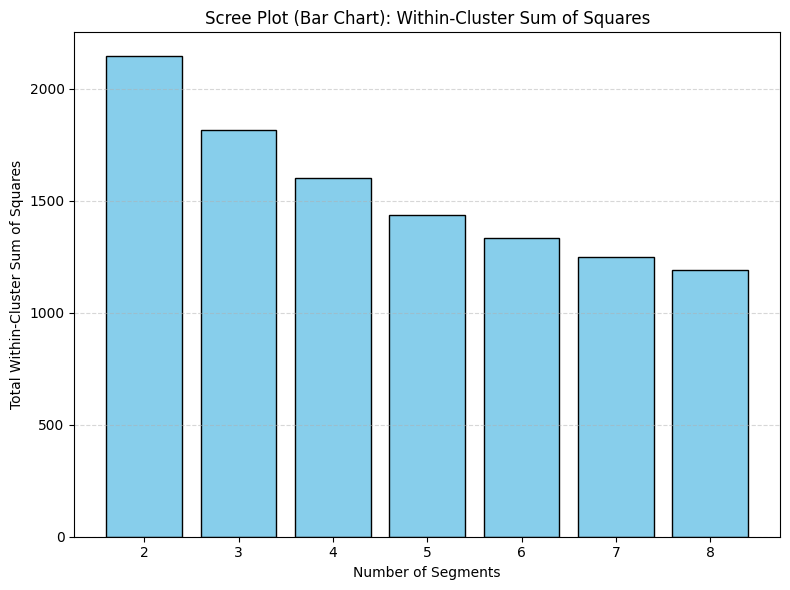

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Calculate WCSS for k = 2 to 8
k_values = range(2, 9)
wcss = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(numeric_matrix)
    wcss.append(kmeans.inertia_)

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(k_values, wcss, color='skyblue', edgecolor='black')
plt.title("Scree Plot (Bar Chart): Within-Cluster Sum of Squares")
plt.xlabel("Number of Segments")
plt.ylabel("Total Within-Cluster Sum of Squares")
plt.xticks(k_values)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


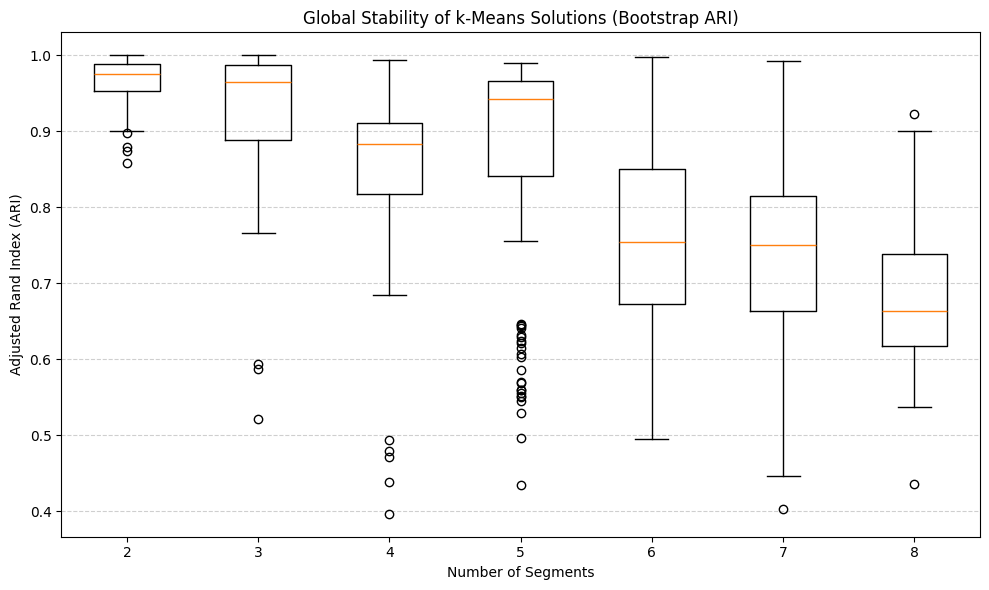

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample

# Set seed for reproducibility
np.random.seed(1234)

# Parameters
k_range = range(2, 9)
n_boot = 100
n_init = 10

# Store ARI scores for each k
stability_scores = {k: [] for k in k_range}

# Reference clustering on full data
reference_labels = {
    k: KMeans(n_clusters=k, n_init=n_init, random_state=1234).fit(numeric_matrix).labels_
    for k in k_range
}

# Bootstrap and compare ARI
for i in range(n_boot):
    sample = resample(numeric_matrix, replace=True, n_samples=len(numeric_matrix), random_state=i)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, n_init=n_init, random_state=i)
        labels_sample = kmeans.fit_predict(sample)

        # Get corresponding reference labels
        labels_full = reference_labels[k]

        # Map sample indices back to full data for ARI
        indices = [np.where((numeric_matrix == row).all(axis=1))[0][0] for row in sample]
        labels_ref_subset = labels_full[indices]

        ari = adjusted_rand_score(labels_ref_subset, labels_sample)
        stability_scores[k].append(ari)

# Create boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([stability_scores[k] for k in k_range], tick_labels=k_range)
plt.title("Global Stability of k-Means Solutions (Bootstrap ARI)")
plt.xlabel("Number of Segments")
plt.ylabel("Adjusted Rand Index (ARI)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


C:\Users\sreeya ravikumar\AppData\Local\Temp\ipykernel_5828\1724186160.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  segmentation_df = segmentation_df.replace({'Yes': 1, 'No': 0})


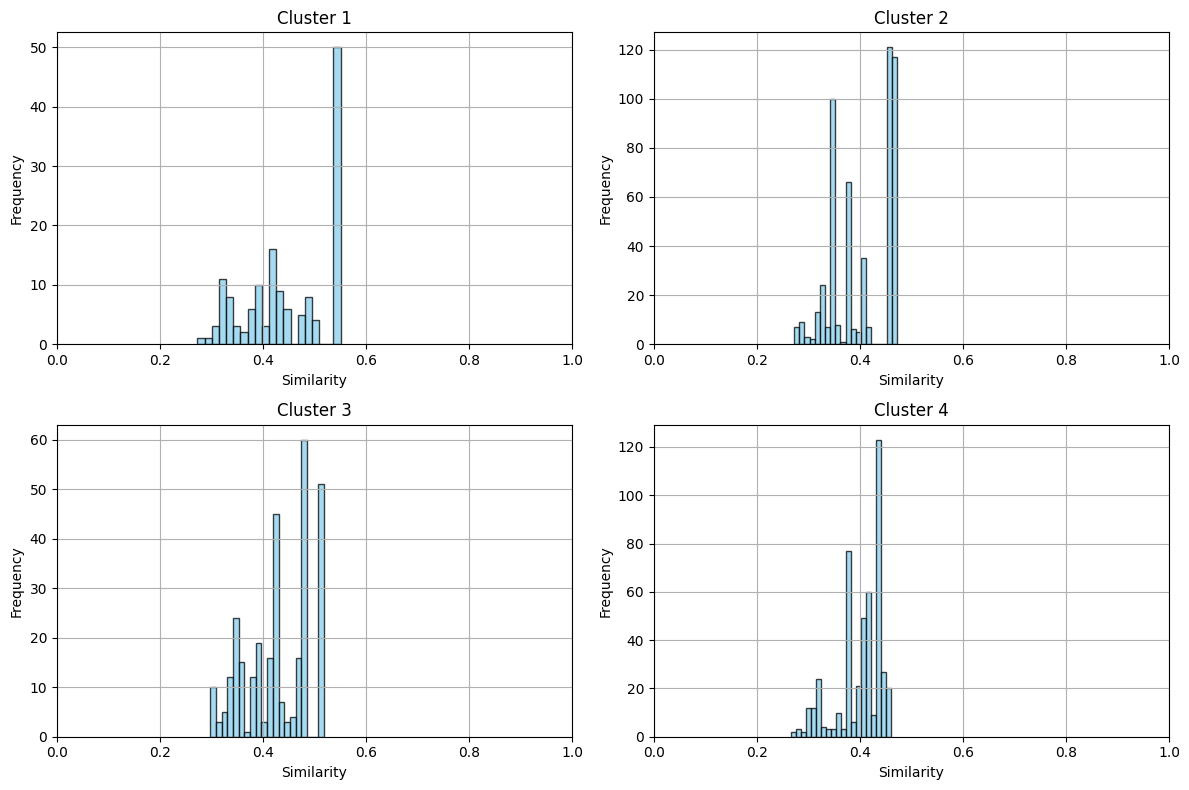

In [9]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

# Step 2: Load the dataset
df = pd.read_csv("mcdonalds.csv")

# Step 3: Select the first 11 columns
segmentation_df = df.iloc[:, :11]

# Step 4: Convert 'Yes'/'No' to binary 1/0
segmentation_df = segmentation_df.replace({'Yes': 1, 'No': 0})

# Step 5: Convert to NumPy array
segmentation_matrix = segmentation_df.values

# Step 6: Apply KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=123)
labels = kmeans.fit_predict(segmentation_matrix)

# Step 7: Compute similarity matrix
def compute_similarity_matrix(X, centroids, gamma=1):
    distances = cdist(X, centroids)
    sim = np.exp(-distances ** gamma)
    sim = sim / sim.sum(axis=1, keepdims=True)
    return sim

similarities = compute_similarity_matrix(segmentation_matrix, kmeans.cluster_centers_, gamma=1)

# Step 8: Plot Gorge plots in 2x2 grid
def plot_gorge(similarities, labels, n_clusters):
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    axs = axs.flatten()  # to index subplots easily in 1D
    for k in range(n_clusters):
        cluster_similarities = similarities[labels == k, k]
        axs[k].hist(cluster_similarities, bins=20, alpha=0.75, color='skyblue', edgecolor='black')
        axs[k].set_title(f'Cluster {k+1}')
        axs[k].set_xlim(0, 1)
        axs[k].set_xlabel('Similarity')
        axs[k].set_ylabel('Frequency')
        axs[k].grid(True)
    plt.tight_layout()
    plt.show()

plot_gorge(similarities, labels, n_clusters=4)


In [14]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# Run k-means from 2 to 8 clusters
k_range = range(2, 9)
labels_list = []

for k in k_range:
    km = KMeans(n_clusters=k, random_state=123).fit(segmentation_matrix)
    labels_list.append(km.labels_)

# Build nodes and links
labels_flat = []
node_id = {}
node_idx = 0
for i, k in enumerate(k_range):
    unique_labels = np.unique(labels_list[i])
    for l in unique_labels:
        name = f'k={k}, s{l+1}'
        labels_flat.append(name)
        node_id[(k, l)] = node_idx
        node_idx += 1

source = []
target = []
value = []

for i in range(len(k_range) - 1):
    k1 = k_range[i]
    k2 = k_range[i + 1]
    labels1 = labels_list[i]
    labels2 = labels_list[i + 1]
    for l1 in np.unique(labels1):
        for l2 in np.unique(labels2):
            count = np.sum((labels1 == l1) & (labels2 == l2))
            if count > 0:
                source.append(node_id[(k1, l1)])
                target.append(node_id[(k2, l2)])
                value.append(count)

# Create Sankey plot
fig = go.Figure(data=[go.Sankey(
    node=dict(pad=15, thickness=20, line=dict(color="black", width=0.5), label=labels_flat),
    link=dict(source=source, target=target, value=value)
)])
fig.update_layout(title_text="Segment Level Stability Across Solutions (SLSA)", font_size=10)
fig.show()


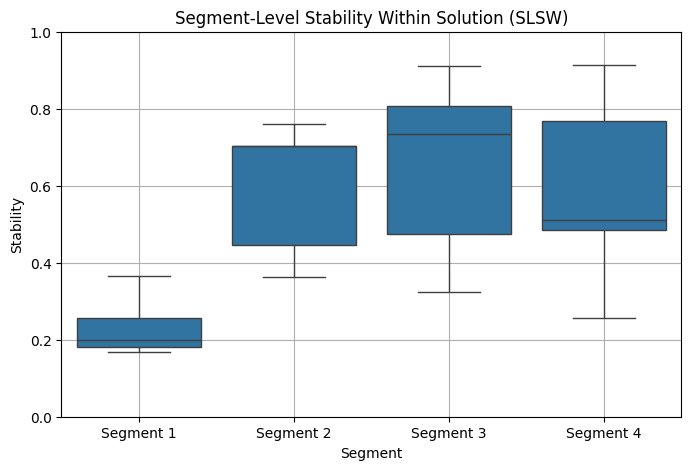

In [17]:
from sklearn.metrics import jaccard_score
import seaborn as sns
import matplotlib.pyplot as plt

def compute_segment_stability(X, n_clusters=4, n_reps=10):
    base_model = KMeans(n_clusters=n_clusters, random_state=123)
    base_labels = base_model.fit_predict(X)

    stabilities = [[] for _ in range(n_clusters)]
    
    for rep in range(n_reps):
        rep_model = KMeans(n_clusters=n_clusters, random_state=rep)
        rep_labels = rep_model.fit_predict(X)

        for i in range(n_clusters):
            base_mask = (base_labels == i)
            max_jaccard = 0
            for j in range(n_clusters):
                rep_mask = (rep_labels == j)
                score = jaccard_score(base_mask, rep_mask)
                if score > max_jaccard:
                    max_jaccard = score
            stabilities[i].append(max_jaccard)
    
    return stabilities

# Compute stabilities for k=4
stability_scores = compute_segment_stability(segmentation_matrix, n_clusters=4, n_reps=10)

# Convert to DataFrame for boxplot
df_stability = pd.DataFrame({f"Segment {i+1}": s for i, s in enumerate(stability_scores)})
df_stability_melted = df_stability.melt(var_name="Segment", value_name="Stability")

# Plot boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_stability_melted, x="Segment", y="Stability")
plt.title("Segment-Level Stability Within Solution (SLSW)")
plt.ylim(0, 1)
plt.grid(True)
plt.show()


In [34]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from scipy.special import logsumexp

# Step 1: Encode Yes/No to 1/0
encoder = OrdinalEncoder()
X = encoder.fit_transform(segmentation_df).astype(int)

# EM algorithm for Bernoulli mixture
def bernoulli_em(X, k, max_iter=100, tol=1e-4, n_init=10):
    best_log_likelihood = -np.inf
    best_params = None
    
    for _ in range(n_init):
        n, d = X.shape
        
        # Random initialization
        weights = np.full(k, 1 / k)
        probs = np.random.rand(k, d)
        responsibilities = np.zeros((n, k))

        for iteration in range(max_iter):
            # E-Step
            for i in range(k):
                p = probs[i]
                responsibilities[:, i] = weights[i] * np.prod(p**X * (1 - p)**(1 - X), axis=1)

            responsibilities /= responsibilities.sum(axis=1, keepdims=True)
            
            # M-Step
            weights = responsibilities.mean(axis=0)
            for i in range(k):
                probs[i] = (responsibilities[:, i][:, None] * X).sum(axis=0) / responsibilities[:, i].sum()

            # Compute log-likelihood
            log_likelihood = np.sum(np.log(np.sum([
                weights[i] * np.prod(probs[i]**X * (1 - probs[i])**(1 - X), axis=1)
                for i in range(k)
            ], axis=0)))
            
            if abs(log_likelihood - best_log_likelihood) < tol:
                break

        if log_likelihood > best_log_likelihood:
            best_log_likelihood = log_likelihood
            best_params = (weights, probs)

    return best_log_likelihood, best_params

# Evaluate models for k = 2 to 8
log_likelihoods, aics, bics = [], [], []
n, d = X.shape

for k in range(2, 9):
    logLik, _ = bernoulli_em(X, k, n_init=5)
    log_likelihoods.append(logLik)
    
    n_params = k * d + k - 1  # parameters: prob values + weights
    aic = -2 * logLik + 2 * n_params
    bic = -2 * logLik + n_params * np.log(n)
    
    aics.append(aic)
    bics.append(bic)

# Show results
results_df = pd.DataFrame({
    "k": range(2, 9),
    "logLik": log_likelihoods,
    "AIC": aics,
    "BIC": bics
})
print(results_df)


   k       logLik           AIC           BIC
0  2 -7610.836090  15267.672179  15389.144050
1  3 -7311.488436  14692.976871  14877.825369
2  4 -7111.115649  14316.231299  14564.456425
3  5 -7011.167460  14140.334920  14451.936675
4  6 -6958.484356  14058.968712  14433.947094
5  7 -6900.378413  13966.756826  14405.111836
6  8 -6873.709632  13937.419265  14439.150903


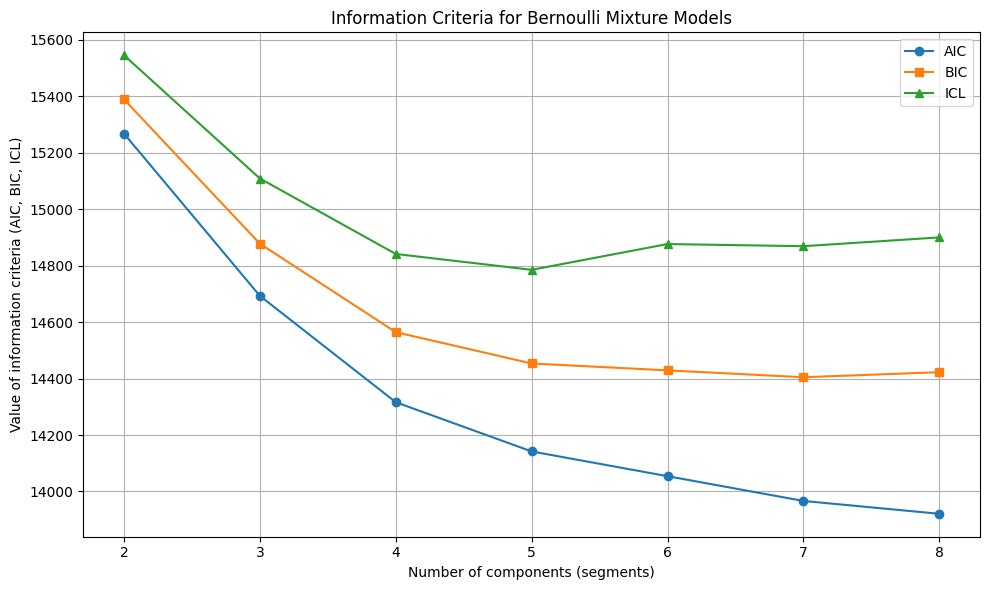

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from scipy.special import logsumexp

# Step 1: Encode 'Yes'/'No' to binary (1/0)
encoder = OrdinalEncoder()
X = encoder.fit_transform(segmentation_df).astype(int)

# Step 2: Custom EM algorithm for Bernoulli mixture
def bernoulli_em(X, k, max_iter=100, tol=1e-4, n_init=5):
    best_log_likelihood = -np.inf
    best_params = None
    n, d = X.shape

    for _ in range(n_init):
        # Initialize
        weights = np.full(k, 1 / k)
        probs = np.random.rand(k, d)
        responsibilities = np.zeros((n, k))

        for iteration in range(max_iter):
            # E-step
            for i in range(k):
                p = probs[i]
                responsibilities[:, i] = weights[i] * np.prod(p**X * (1 - p)**(1 - X), axis=1)
            responsibilities /= responsibilities.sum(axis=1, keepdims=True)

            # M-step
            weights = responsibilities.mean(axis=0)
            for i in range(k):
                probs[i] = (responsibilities[:, i][:, None] * X).sum(axis=0) / responsibilities[:, i].sum()

            # Log-likelihood
            log_prob = []
            for i in range(k):
                p = probs[i]
                log_p = np.sum(X * np.log(p + 1e-8) + (1 - X) * np.log(1 - p + 1e-8), axis=1)
                log_prob.append(np.log(weights[i]) + log_p)
            log_prob = np.vstack(log_prob).T
            log_likelihood = np.sum(logsumexp(log_prob, axis=1))

            if log_likelihood > best_log_likelihood + tol:
                best_log_likelihood = log_likelihood
                best_params = (weights.copy(), probs.copy())

    return best_log_likelihood, best_params, responsibilities

# Step 3: Loop through k=2 to 8 and store criteria
n, d = X.shape
log_likelihoods = []
aics = []
bics = []
icls = []

for k in range(2, 9):
    logLik, (weights, probs), resp = bernoulli_em(X, k)
    log_likelihoods.append(logLik)

    n_params = k * d + k - 1  # prob params + weights
    aic = -2 * logLik + 2 * n_params
    bic = -2 * logLik + n_params * np.log(n)

    # ICL = BIC - entropy of responsibilities
    entropy = -np.sum(resp * np.log(resp + 1e-8))
    icl = bic + entropy

    aics.append(aic)
    bics.append(bic)
    icls.append(icl)

# Step 4: Plot AIC, BIC, ICL (like Fig A.7)
plt.figure(figsize=(10, 6))
ks = range(2, 9)
plt.plot(ks, aics, marker='o', label="AIC")
plt.plot(ks, bics, marker='s', label="BIC")
plt.plot(ks, icls, marker='^', label="ICL")
plt.xlabel("Number of components (segments)")
plt.ylabel("Value of information criteria (AIC, BIC, ICL)")
plt.title("Information Criteria for Bernoulli Mixture Models")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [40]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder
from scipy.special import logsumexp

# Step 1: Encode Yes/No to 0/1
encoder = OrdinalEncoder()
X = encoder.fit_transform(segmentation_df).astype(int)
n, d = X.shape

# Step 2: Run k-means with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=123)
kmeans_labels = kmeans.fit_predict(X)

# Step 3: Define EM function (if not already defined)
def bernoulli_em(X, k, max_iter=100, tol=1e-4, n_init=5, init_labels=None):
    best_log_likelihood = -np.inf
    best_params = None
    best_resp = None
    n, d = X.shape

    if init_labels is not None:
        k = len(np.unique(init_labels))
        weights = np.array([(init_labels == i).mean() for i in range(k)])
        probs = np.array([
            X[init_labels == i].mean(axis=0) for i in range(k)
        ])
    else:
        weights = np.full(k, 1 / k)
        probs = np.random.rand(k, d)

    for _ in range(n_init if init_labels is None else 1):  # only one run if init provided
        for iteration in range(max_iter):
            # E-step
            responsibilities = np.zeros((n, k))
            for i in range(k):
                p = probs[i]
                responsibilities[:, i] = weights[i] * np.prod(p**X * (1 - p)**(1 - X), axis=1)
            responsibilities /= responsibilities.sum(axis=1, keepdims=True)

            # M-step
            weights = responsibilities.mean(axis=0)
            for i in range(k):
                probs[i] = (responsibilities[:, i][:, None] * X).sum(axis=0) / responsibilities[:, i].sum()

            # Log-likelihood
            log_prob = []
            for i in range(k):
                p = probs[i]
                log_p = np.sum(X * np.log(p + 1e-8) + (1 - X) * np.log(1 - p + 1e-8), axis=1)
                log_prob.append(np.log(weights[i]) + log_p)
            log_prob = np.vstack(log_prob).T
            log_likelihood = np.sum(logsumexp(log_prob, axis=1))

            if log_likelihood > best_log_likelihood + tol:
                best_log_likelihood = log_likelihood
                best_params = (weights.copy(), probs.copy())
                best_resp = responsibilities.copy()

    return best_log_likelihood, best_params, best_resp

# Step 4: Run EM for 4 clusters with random init (like MD.m4)
logLik_rand, (weights_rand, probs_rand), resp_rand = bernoulli_em(X, 4, n_init=10)
lca_labels_rand = resp_rand.argmax(axis=1)

# Step 5: Run EM with k-means initialization (like MD.m4a)
logLik_kmeans_init, (weights_km, probs_km), resp_km = bernoulli_em(X, 4, init_labels=kmeans_labels)
lca_labels_kmeans_init = resp_km.argmax(axis=1)

# Step 6: Cross-tabulation
print("\n Cross-tabulation: k-means vs LCA (random init)")
ct_rand = pd.crosstab(kmeans_labels, lca_labels_rand, rownames=['kmeans'], colnames=['mixture'])
print(ct_rand)

print("\n Cross-tabulation: k-means vs LCA (k-means init)")
ct_kmeans_init = pd.crosstab(kmeans_labels, lca_labels_kmeans_init, rownames=['kmeans'], colnames=['mixture'])
print(ct_kmeans_init)

# Step 7: Compare log-likelihoods
print("\nLog-likelihood with random init (MD.m4):", round(logLik_rand, 3))
print("Log-likelihood with k-means init (MD.m4a):", round(logLik_kmeans_init, 3))



 Cross-tabulation: k-means vs LCA (random init)
mixture    0    1    2    3
kmeans                     
0          2  113   31    0
1          0  479   52    0
2        278    0    0   28
3          1    0  296  173

 Cross-tabulation: k-means vs LCA (k-means init)
mixture    0    1    2    3
kmeans                     
0        136    1    2    7
1         59  469    0    3
2          0    0  304    2
3         16   21    2  431

Log-likelihood with random init (MD.m4): -7111.108
Log-likelihood with k-means init (MD.m4a): -7266.692


C:\Users\sreeya ravikumar\AppData\Local\Temp\ipykernel_5828\2320011779.py:16: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



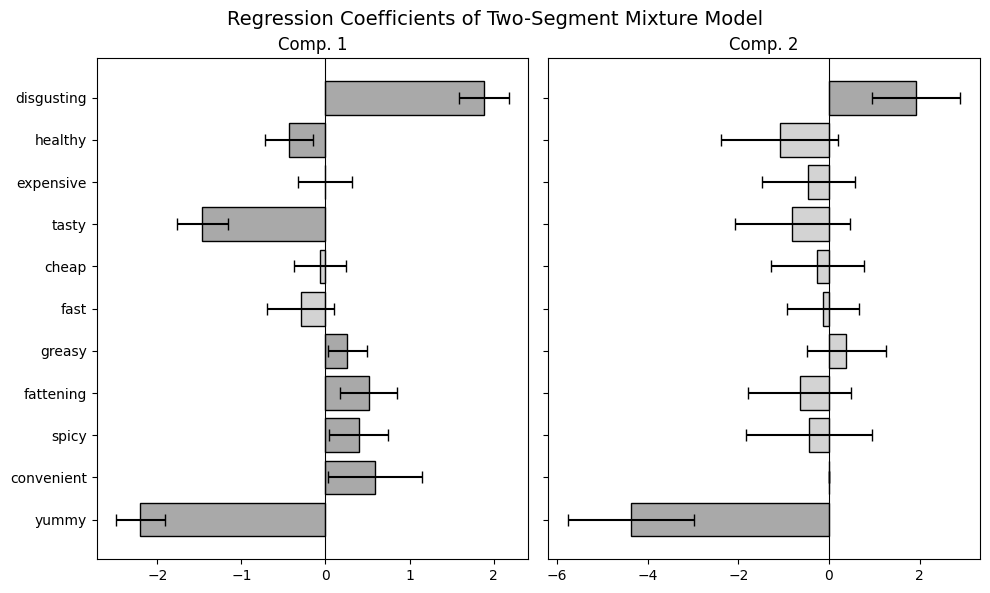

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import OrdinalEncoder

# STEP 1: Convert 'LIKE' to numeric Like.n from +5 to -5
like_order = [
    "I hate it!-5", "-4", "-3", "-2", "-1", "0",
    "+1", "+2", "+3", "+4", "I love it!+5"
]
df["Like.n"] = 6 - df["Like"].apply(lambda x: like_order.index(x) + 1)

# STEP 2: Prepare perception variables (columns 1 to 11 assumed)
X = df.iloc[:, :11].replace({"Yes": 1, "No": 0})
X_names = X.columns.tolist()
y = df["Like.n"].values.reshape(-1, 1)

# STEP 3: Fit Gaussian Mixture on [X | y] to simulate latent class regression
XY = np.hstack([X.values, y])
gmm = GaussianMixture(n_components=2, covariance_type="full", random_state=123)
gmm.fit(XY)
segments = gmm.predict(XY)
df["Segment"] = segments

# STEP 4: Fit OLS regression within each segment and collect results
segment_models = {}
coef_df_list = []

for seg in np.unique(segments):
    X_seg = X[segments == seg]
    y_seg = df["Like.n"][segments == seg]

    X_const = sm.add_constant(X_seg)
    model = sm.OLS(y_seg, X_const).fit()
    segment_models[seg] = model

    coefs = model.params
    stderr = model.bse
    pvals = model.pvalues
    significance = pvals < 0.05

    coef_df = pd.DataFrame({
        "Variable": coefs.index,
        "Coefficient": coefs.values,
        "StdErr": stderr,
        "p-value": pvals,
        "Significant": significance,
        "Segment": f"Comp. {seg + 1}"
    })
    coef_df_list.append(coef_df)

# STEP 5: Prepare for Figure A.8 style plotting
plot_df = pd.concat(coef_df_list)
plot_df = plot_df[plot_df["Variable"] != "const"]
plot_df["Variable"] = plot_df["Variable"].str.replace("Yes", "")  # clean for display

# Set custom variable order: top = "yummy", bottom = "disgusting"
var_order = [
    "yummy", "convenient", "spicy", "fattening", "greasy",
    "fast", "cheap", "tasty", "expensive", "healthy", "disgusting"
]
plot_df["Variable"] = pd.Categorical(plot_df["Variable"], categories=var_order, ordered=True)
plot_df.sort_values(["Variable", "Segment"], inplace=True)

# STEP 6: Plot in Figure A.8 format
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
segments = plot_df["Segment"].unique()

for ax, seg in zip(axes, segments):
    sub = plot_df[plot_df["Segment"] == seg]
    y_pos = np.arange(len(sub))
    colors = ["darkgray" if sig else "lightgray" for sig in sub["Significant"]]

    bars = ax.barh(
        y=y_pos,
        width=sub["Coefficient"],
        color=colors,
        edgecolor='black',
        xerr=1.96 * sub["StdErr"],
        capsize=4
    )
    ax.axvline(0, color="black", linewidth=0.8)
    ax.set_title(seg)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(sub["Variable"])
    ax.invert_yaxis()

fig.suptitle("Regression Coefficients of Two-Segment Mixture Model", fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()


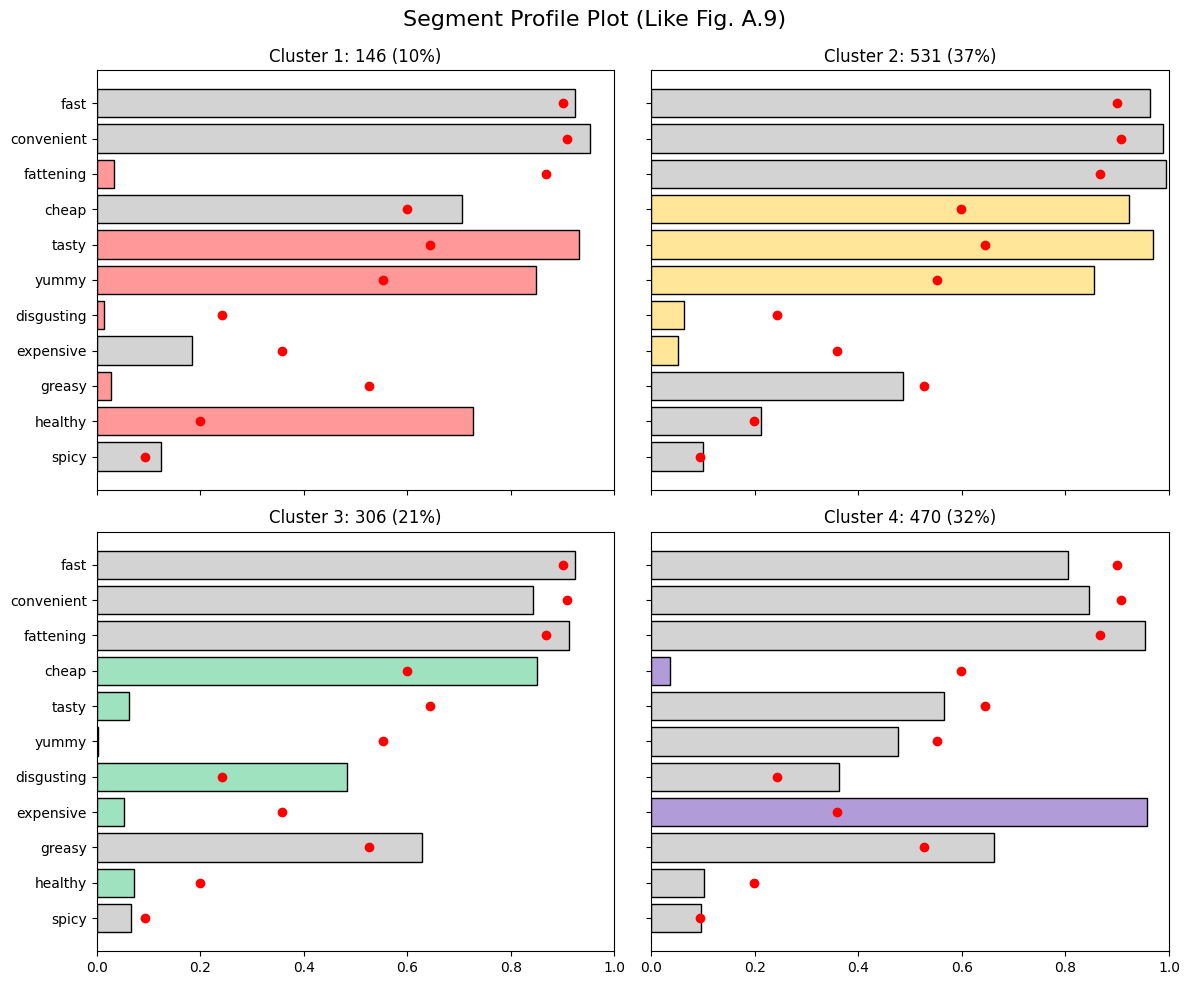

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram

# Assume you already have:
# segmentation_df (binary perception data)
# kmeans_labels (4-segment k-means clustering result)

df_profiles = segmentation_df.copy()
df_profiles["Segment"] = kmeans_labels

# Compute segment proportions
segment_props = df_profiles.groupby("Segment").mean()
overall_props = segmentation_df.mean()

# Hierarchical clustering for attribute ordering
Z = linkage(segmentation_df.T, method="ward")
dendro = dendrogram(Z, no_plot=True)
var_order = [segmentation_df.columns[i] for i in dendro["leaves"]]

# Function to identify marker variables
def is_marker(segment_pct, overall_pct, threshold=0.25, relative=0.5):
    diff_abs = np.abs(segment_pct - overall_pct)
    diff_rel = diff_abs / overall_pct.replace(0, 1e-6)
    return (diff_abs > threshold) | (diff_rel > relative)

# Plot setup
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)
axes = axes.flatten()
colors = ["#FF9999", "#FFE699", "#9FE2BF", "#B19CD9"]

for i in range(4):
    ax = axes[i]
    seg_data = segment_props.loc[i]
    overall = overall_props[seg_data.index]
    is_marker_var = is_marker(seg_data, overall)

    ax.barh(
        var_order,
        seg_data[var_order],
        color=[colors[i] if is_marker_var[v] else "lightgray" for v in var_order],
        edgecolor="black"
    )
    ax.plot(overall[var_order], np.arange(len(var_order)), "ro", label="Overall")

    seg_size = (df_profiles["Segment"] == i).sum()
    total = len(df_profiles)
    ax.set_title(f"Cluster {i+1}: {seg_size} ({seg_size/total:.0%})")
    ax.invert_yaxis()
    ax.set_xlim(0, 1)

plt.suptitle("Segment Profile Plot (Like Fig. A.9)", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


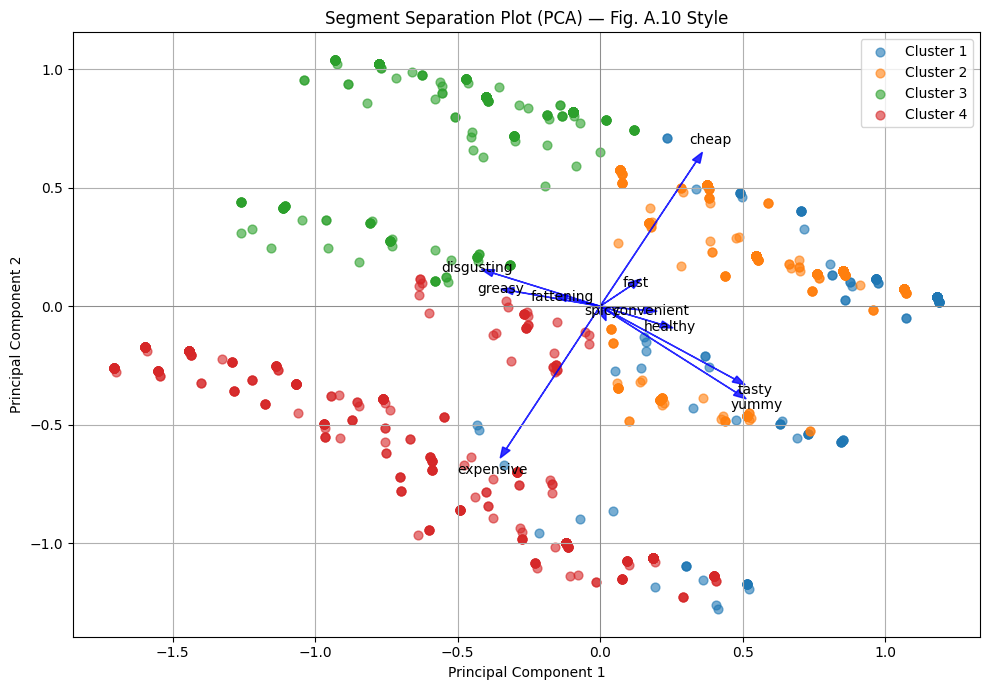

In [49]:
from sklearn.decomposition import PCA

# Run PCA on binary perception data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(segmentation_df)

# Project original features (loadings for arrows)
loadings = pca.components_.T
var_names = segmentation_df.columns

# Plot
plt.figure(figsize=(10, 7))
palette = sns.color_palette("tab10", 4)

# Scatter plot of customers
for i in range(4):
    plt.scatter(
        X_pca[kmeans_labels == i, 0],
        X_pca[kmeans_labels == i, 1],
        label=f"Cluster {i+1}",
        alpha=0.6,
        s=40
    )

# Add attribute arrows (biplot style)
for i, var in enumerate(var_names):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='blue', alpha=0.8, head_width=0.03)
    plt.text(loadings[i, 0]*1.15, loadings[i, 1]*1.15, var, color='black', ha='center', va='center')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)
plt.title("Segment Separation Plot (PCA) — Fig. A.10 Style")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

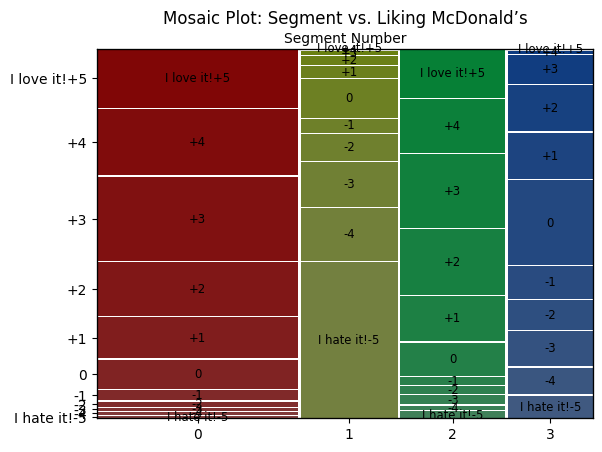

<Figure size 800x600 with 0 Axes>

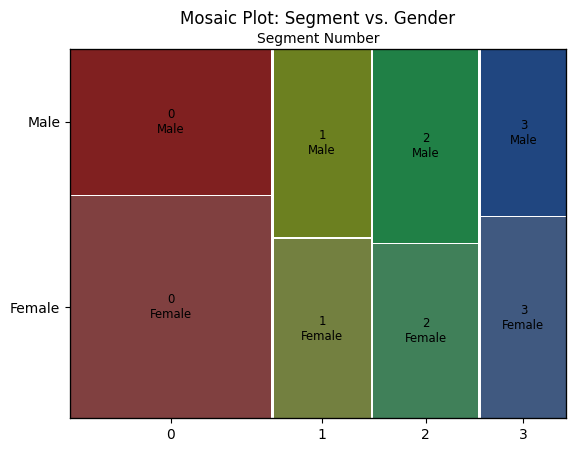

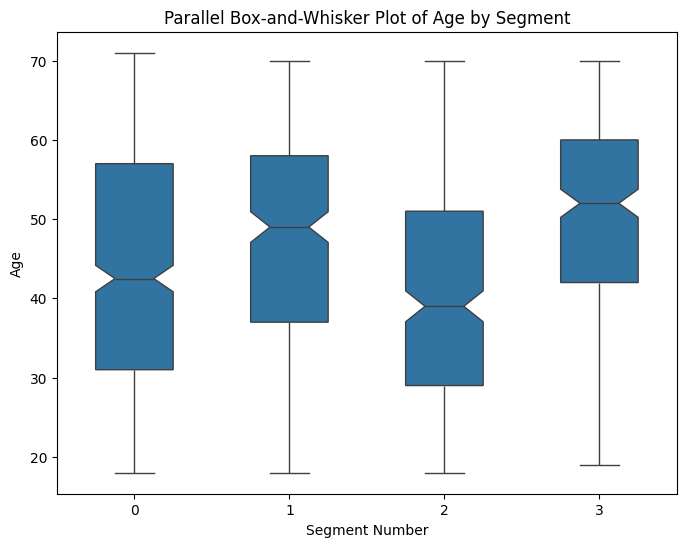

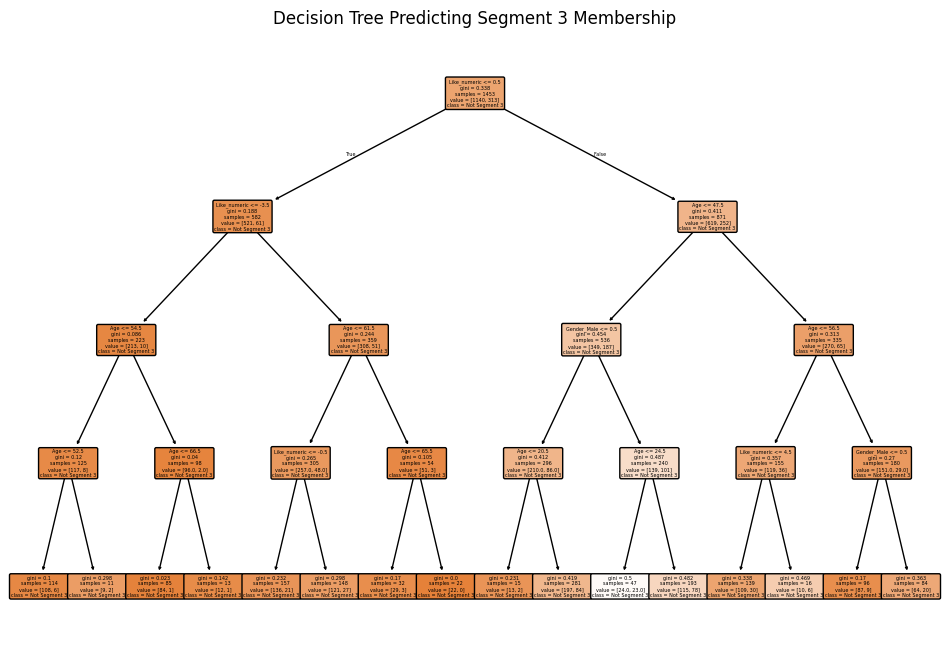

In [75]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
from sklearn.preprocessing import normalize
from scipy.spatial.distance import cdist
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
import re  # For extracting numeric values from strings

# Set seed for reproducibility
np.random.seed(1234)

# Step 6: Visualize Association Between Segment Membership and Descriptor Variables
# Mosaic Plot: Segment vs. Liking McDonald's
# Since 'Like' might have strings, we'll extract numeric values for visualization if needed
# However, the mosaic plot can handle the string values directly, so we proceed as is
plt.figure(figsize=(10, 6))
cross_tab_like = pd.crosstab(df['Segment'], df['Like'])
mosaic_data_like = {(segment, like): count for segment, row in cross_tab_like.iterrows() 
                    for like, count in row.items()}
mosaic(mosaic_data_like, title='', labelizer=lambda k: f'{k[1]}' if k[1] != 0 else '', 
       axes_label=True)
plt.xlabel('Segment Number')
plt.ylabel('Liking McDonald’s')
plt.title('Mosaic Plot: Segment vs. Liking McDonald’s')
plt.show()

# Mosaic Plot: Segment vs. Gender
plt.figure(figsize=(8, 6))
cross_tab_gender = pd.crosstab(df['Segment'], df['Gender'])
mosaic_data_gender = {(segment, gender): count for segment, row in cross_tab_gender.iterrows() 
                      for gender, count in row.items()}
mosaic(mosaic_data_gender, title='', axes_label=True)
plt.xlabel('Segment Number')
plt.ylabel('Gender')
plt.title('Mosaic Plot: Segment vs. Gender')
plt.show()

# Parallel Box-and-Whisker Plot: Age by Segment
plt.figure(figsize=(8, 6))
sns.boxplot(x='Segment', y='Age', data=df, notch=True, width=0.5)
plt.xlabel('Segment Number')
plt.ylabel('Age')
plt.title('Parallel Box-and-Whisker Plot of Age by Segment')
plt.show()

# Step 7: Conditional Inference Tree for Segment 3 Membership
# Create a binary target: 1 if Segment 3, 0 otherwise
df['Is_Segment_3'] = (df['Segment'] == 2).astype(int)  # Segment labels are 0-3, so Segment 3 is label 2

# Preprocess the 'Like' column to extract numeric values
# The 'Like' column has values like 'I hate it!-5', so we extract the numeric part
def extract_numeric_like(value):
    # Extract the number at the end, which may have a + or - sign
    match = re.search(r'[+-]?\d+$', str(value))
    if match:
        return int(match.group())
    else:
        raise ValueError(f"Cannot extract numeric value from 'Like' entry: {value}")

# Apply the extraction to the 'Like' column
df['Like_numeric'] = df['Like'].apply(extract_numeric_like)

# Select descriptor variables for the tree
X_tree = df[['Age', 'Like_numeric']]  # Use the numeric version of 'Like'
# Encode the categorical 'Gender' column
X_tree = pd.get_dummies(X_tree.join(df['Gender']), columns=['Gender'], drop_first=True)

# Fit a decision tree (as a proxy for conditional inference tree)
tree = DecisionTreeClassifier(max_depth=4, random_state=123)
tree.fit(X_tree, df['Is_Segment_3'])

# Plot the tree
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=X_tree.columns, class_names=['Not Segment 3', 'Segment 3'], 
          filled=True, rounded=True)
plt.title('Decision Tree Predicting Segment 3 Membership')
plt.show()

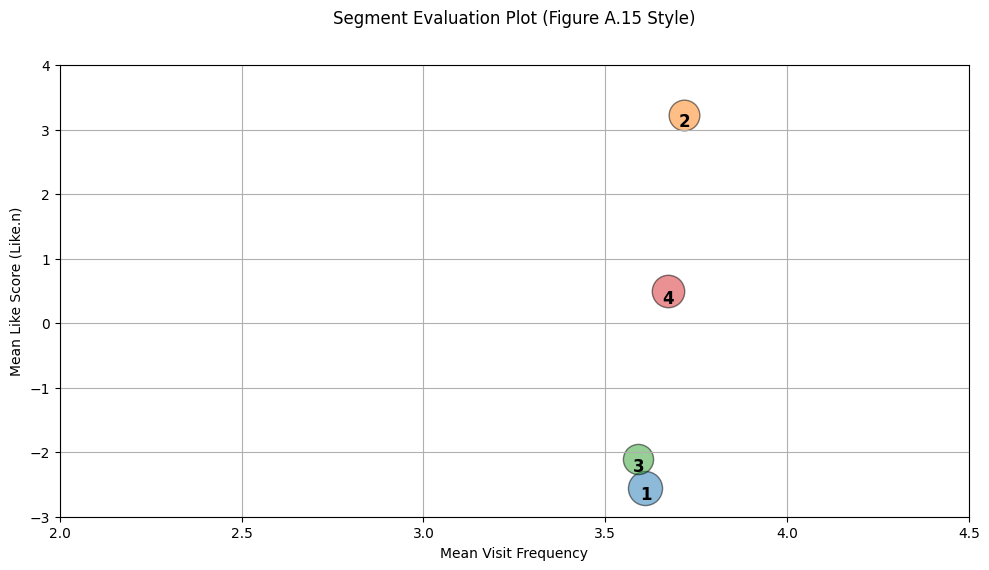

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- STEP 0: Prepare Required Columns ---

# 1. Convert LIKE to Like.n scale (+5 to -5)
like_order = [
    "I hate it!-5", "-4", "-3", "-2", "-1", "0",
    "+1", "+2", "+3", "+4", "I love it!+5"
]
df["Like"] = pd.Categorical(df["Like"], categories=like_order, ordered=True)
df["Like.n"] = 6 - df["Like"].cat.codes - 1  # Converts LIKE to +5 to -5

# 2. Convert VisitFrequency to numeric
df["VisitFrequency"] = df["VisitFrequency"].astype(str)
visit_freq_order = sorted(df["VisitFrequency"].unique())
visit_map = {v: i + 1 for i, v in enumerate(visit_freq_order)}
df["VisitFreqNum"] = df["VisitFrequency"].map(visit_map)

# 3. Drop rows with missing values
df = df.dropna(subset=["VisitFreqNum", "Like.n", "Gender", "Segment"])

# --- STEP 1: Compute segment-level statistics ---

visit_mean = df.groupby("Segment")["VisitFreqNum"].mean()
like_mean = df.groupby("Segment")["Like.n"].mean()
female_mean = df.groupby("Segment")["Gender"].apply(lambda x: (x == "Female").mean())

# --- STEP 2: Plot Segment Evaluation Bubble Plot (Figure A.15 Style) ---

plt.figure(figsize=(10, 6))
scale = 1000  # scale factor for bubble size

for seg in sorted(df["Segment"].unique()):
    if seg not in visit_mean or seg not in like_mean or seg not in female_mean:
        continue  # Skip incomplete segments

    x = visit_mean[seg]
    y = like_mean[seg]
    size = max(female_mean[seg] * scale, 60)  # prevent invisible bubbles

    plt.scatter(x, y, s=size, alpha=0.5, edgecolor='black', label=f"Segment {seg+1}")
    # Offset text slightly below to avoid collision with top axis/title
    plt.text(x, y - 0.1, str(seg+1), fontsize=12, ha='center', va='center', fontweight='bold')

# Styling
plt.xlabel("Mean Visit Frequency")
plt.ylabel("Mean Like Score (Like.n)")
plt.xlim(2, 4.5)
plt.ylim(-3, 4) 

plt.title("Segment Evaluation Plot (Figure A.15 Style)", pad=30)
plt.grid(True)
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Push plot area downward
plt.show()
